In [1]:
import sys
sys.path.append('../sample/')
from metropolis_sampler import MetropolisSampler

from random import uniform, gauss
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def initialize_state(dim):
  
    return np.array([uniform(-10, 10) for i in range(dim)])


def markov_process(x, step_length):

    result = x.copy()
    
    for i, item in enumerate(result):
        
        result[i] = item + gauss(0, 1) * step_length  
    
    return result

In [3]:
def N(mu, sigma):
    """ float * float -> ([float] -> float)
    """
    return lambda x: np.exp(- np.sum(np.square((x - mu) / sigma)))


## Recall SimulatedAnnealing is searching the argmin, instead of argmax.
def target_function(x):
    """ [float] -> float
    """
    return 1 * N(-5, 5)(x) + 100 * N(5, 5)(x)

def log_target_distribution(T):
    """ float -> ([float] -> float)
    """
    return lambda x: np.log(target_function(x))

In [4]:
def sampling(iterations, burn_in, dim, step_length, T):
    
    def initialize_state_0():
        return initialize_state(dim)
    
    def markov_process_0(x):
        return markov_process(x, step_length)

    ms = MetropolisSampler(iterations,
                           initialize_state_0,
                           markov_process_0,
                           burn_in
                          )
    chain = ms.sampling(log_target_distribution(T))
    
    return chain

In [5]:
dim = 1

## Needs tuning
iterations = int(10 ** 4 * 5)
burn_in = int(0.5 * iterations)
step_length = 0.5
T = 1


chain = sampling(iterations, burn_in, dim, step_length, T)

expect = [np.mean([state[axis] for state in chain])
          for axis in range(dim)
         ]

print('Expects: {0}'.format(expect))

Initial state: [ 3.12426185]
Accept-ratio: 0.9535
Expects: [4.7959000775158716]


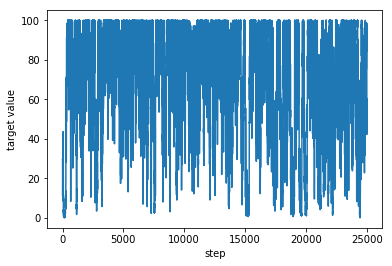

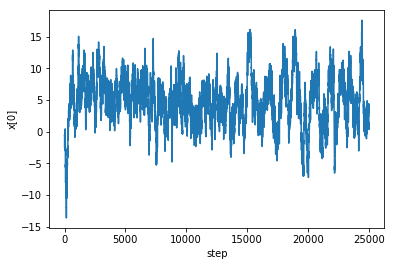

In [6]:
steps = np.arange(len(chain))
targets = [target_function(state) for state in chain]


plt.plot(steps, targets)
plt.xlabel('step')
plt.ylabel('target value')
plt.show()


for axis in range(dim):
    
    xs = [state[axis] for state in chain]

    plt.plot(steps, xs)
    plt.xlabel('step')
    plt.ylabel('x[{0}]'.format(axis))
    plt.show()

Splendid, even for `dim = 10`.